# Gyakorlat 2
## Többváltozós lineáris regresszió:
### Ingatlanárak:

Ebben a feladatban ingatlanárak jóslására fogunk többváltozós lineáris regressziót implementálni.

Tegyük fel, hogy egy lakást szeretnénk eladni, ám ehhez szeretnénk tudni a lakás valós értékét, hogy ne veszítsünk az eladáskor. Egy lehetséges módja ennek, hogy adatot gyűjtve, majd az adatok alapján modellt készítve, jósoljuk meg a lakás ingatlanpiaci árát. Adataink az ingatlan területe és a szobák száma illetve az értékesítéskor meghatározott ár lesz.

### Importjáljuk be a számunkra fontos csomagokat!
Szükségünk lesz:
- NumPy
- MatPlotLib pyplot csomagjára

In [3]:
import numpy as np
import matplotlib.pyplot as plt

Az előző gyakorlathoz hasonlóan töltsük be az adatainkat!

In [6]:
file=open("Lab2data.txt")
data=file.readlines()
file.close()

X=[]
TEMP=[]
Y=[]

for line in data:
    a,b,c = line.split(',')
    X.append(float(a))
    TEMP.append(float(b))
    Y.append(float(c))

X=np.array(X)
TEMP=np.array(TEMP)
X = np.column_stack((X,TEMP))
Y=np.array(Y)
m=Y.size
Y=Y.reshape(m,1)
del TEMP

print('X:',X.shape)
print('Y:',Y.shape)
print('Adatok száma',m)

X: (47, 2)
Y: (47, 1)
Adatok száma 47


### Normalizáljuk az értékeinket (feature scaling):

Az adatainkról elképzelhető, hogy más nagyságrendekben találhatóak. Esetünkben az ingatlan területe és a szobák száma között könnyen beláthatjuk hogy legalább egy nagyságrendi különbség van. Ilyenkor érdemes az értékeinket normalizálni, hogy egy nagyságrendbe essenek.
Ehhez mia az alábbi összefüggést fogjuk használni:
$x_n = \frac{x - mean(x)}{std(x)}$\
További előny még, hogy normalizálás után a grádiens módszer konvergenciája is megnő.

Többet az angol wikipédián találhatunk erről [itt](https://en.wikipedia.org/wiki/Feature_scaling).

Hozzuk is létre a normalizáló függvényt!

In [8]:
def featureNormalize(X):
    X_norm=X.copy()
    avg = np.zeros((1,np.size(X,1)))
    sigma = np.zeros((1,np.size(X,1)))

    for i in range(np.size(X,1)):
        avg[0,i] = np.mean(X[:,i],axis=0)
        sigma[0,i] = np.std(X[:,i],axis=0,ddof=1)   # ddof=1 mert tapasztalati szórás kell

    for i in range(0,np.size(X,1)):
        for j in range(0,np.size(X,0)):
            X_norm[j,i] = (X[j,i]-avg[0,i])/sigma[0,i]

    return X_norm, avg, sigma

print('Normalizing X vector ...')
X_norm,avg,sigma = featureNormalize(X)
X_norm=np.column_stack((np.ones(m),X_norm))

Normalizing X vector ...


### Grádiens módszer:
Az előző gyakorlat mintájára létrehozzuk a grádiens módszert!

In [12]:
def computeCostMulti(X,Y,w):
    C=0
    C=(1/(2*m))*((X@w-Y).T)@(X@w-Y)
    return C

def gradientDescentMulti(X,Y,w,lr,epochs):
    C_history = np.zeros((epochs,1))
    temp= np.zeros((np.size(w,0),1))

    for iteration in range(0,epochs):
       for i in range(0,np.size(w,0)):
           temp[i] = w[i]-(lr/m)*np.sum((X@w-Y)*(X[:,i].reshape(m,1)), axis=None)
       w=temp
       C_history[iteration]=computeCostMulti(X,Y,w)

    return w, C_history

print('Running gradient descent ...')
lr = 0.01
epochs = 400
w=np.zeros((3,1))
w,C_history= gradientDescentMulti(X_norm,Y,w,lr,epochs)
print('''Weights expected from gradient descent:
 [[334302.0639]
 [100158.03182]
 [  3576.7329]]
''')
print('Weights computed from gradient descent:\n', w)


Running gradient descent ...
Weights expected from gradient descent:
 [[334302.0639]
 [100158.03182]
 [  3576.7329]]

Weights computed from gradient descent:
 [[334302.06399328]
 [100158.03182888]
 [  3576.73296507]]


Ellenőrizzük a konvergenciát egy ábra segítségével!

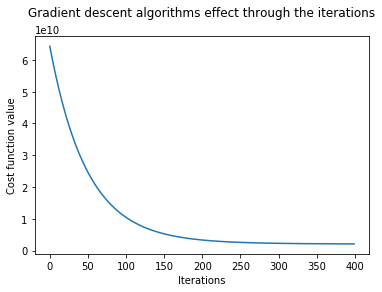

In [13]:
plt.plot(range(0,epochs),C_history)
plt.title("Gradient descent algorithms effect through the iterations",pad= 20)
plt.xlabel("Iterations")
plt.ylabel("Cost function value")
plt.show()

### Jóslat:
Tegyünk értékbeli jóslatot egy 1650 nm és 3 szobás ingatlanra!

In [23]:
FEET = 1650
BED = 3
price = (np.array([1, ((FEET-avg[0,0])/sigma[0,0]), (BED-avg[0,1])/sigma[0,1]]))@w
print('''Prediction for a 1650 sq-ft / 3 bedroom house:
(predicted price should be approx. $29304.98)
''',price)

Prediction for a 1650 sq-ft / 3 bedroom house:
(predicted price should be approx. $29304.98)
 [289304.98230749]


## Kicsit másként. Magasabb szintű csomagokkal

In [34]:
import pandas as pd
from sklearn.linear_model import LinearRegression

data = pd.read_csv('Lab2data.txt',header = None)
X = data.iloc[:, 0:2].values.reshape(-1,2)
Y = data.iloc[:, 2].values.reshape(-1,1)

lin_reg = LinearRegression()
lin_reg.fit(X,Y)

pred = lin_reg.predict([[1650,3]])
print('Prediction for a 1650 sq-ft / 3 bedroom house:\n',float(pred))

Prediction for a 1650 sq-ft / 3 bedroom house:
 293081.4643348961
